In [61]:
import sys 
import os
sys.path.append("../src")
from skeleton_code import *

# Problem 2.2 #

Given the objective function 
$$ J(\theta) = \frac{1}{m}\sum_{i=1}^m \left(h_\theta(x_i) - y_i\right)^2 $$
where $h_\theta(x) = \theta^T x + b$ we can rewrite this as a least squares problem in vector form

$$J(\theta) = \left\lVert X\theta  - y \right\rVert^2$$

where $X\in \mathbf{R}^{m \times (d+1)}$ has the data in rows with an extra column of ones appended.

The gradient of the objective is found by expanding the cost function first into a quadratic form

$$
\begin{align*}
    \nabla J(\theta) &= \nabla_\theta ||X\theta - y||^2\\
    &= \nabla_\theta \left(\theta^TX^TX\theta - 2y^TX\theta + y^Ty\right)\\
    &= 2X^TX\theta - 2X^Ty\\
    &= 2X^T(X\theta - y)
\end{align*}
$$

Performing optimization we seek a descent direction $h$ to decrease the cost of the objective. Writing down the linearization of $J(\theta)$ we have

$$
\begin{align*}
J(\theta_0 + \eta h) &= J(\theta_0) + (\nabla J(\theta_0))^T (\eta h)\\
J(\theta_0 + \eta h) - J(\theta_0) &= 2\eta(X\theta - y)^TXh\\
\end{align*}
$$

The gradient descent iteration then given by 
$$
\begin{align*}
\theta^{k+1} &= \theta^{k} - \eta \nabla_\theta J(\theta^{k})\\
&= \theta^{k} - 2\eta X^T(X\theta^{k} - y)\\
\end{align*}
$$

In [31]:
N = 10
theta = np.array([[1], [0.5]])
Xexample = np.hstack([5*np.random.rand(N,1), np.ones((N,1))])
yexample = Xexample.dot(theta) + 0.2*np.random.randn(N,1)
                                              

In [62]:
theta_hist, loss_hist = batch_grad_descent(Xexample, np.squeeze(yexample), 0.01)

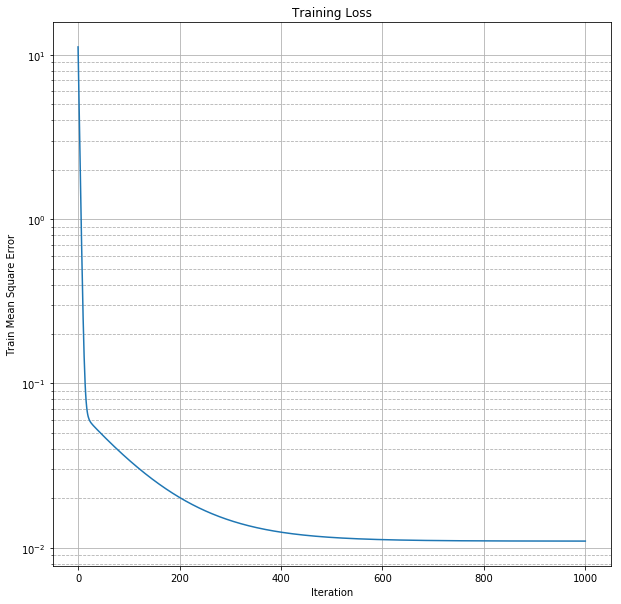

In [77]:
plt.figure(figsize=(10,10))

plt.semilogy(loss_hist)
plt.title('Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Train Mean Square Error')
plt.grid(True)
plt.grid(b=True, which='minor', linestyle='--')

In [73]:
x = np.linspace(0, 2, 100)
y = np.linspace(0, 2, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        theta1 = X[i][j]
        theta2 = Y[i][j]
        Z[i,j] = compute_square_loss(Xexample, np.squeeze(yexample), np.array([theta1, theta2]))

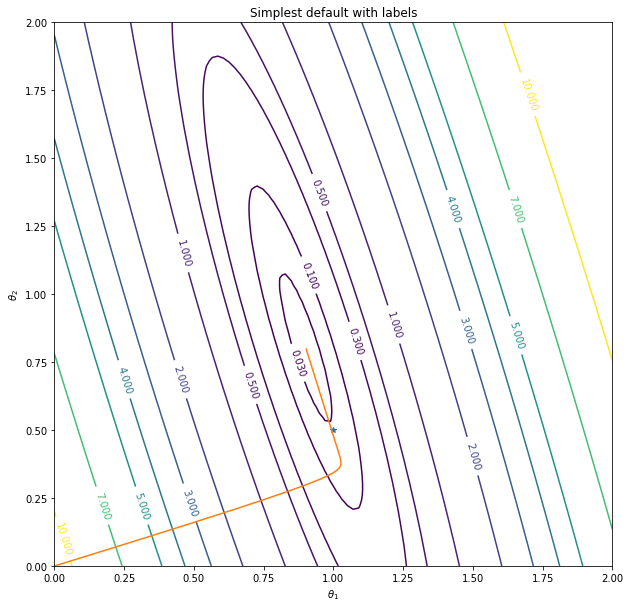

In [74]:
plt.figure(figsize=(10,10));

CS = plt.contour(X, Y, Z, [0.03, 0.1, 0.3, 0.5, 1, 2, 3, 4, 5, 7, 10]);
plt.clabel(CS, inline=1, fontsize=10);
plt.plot(theta[0],theta[1], marker='*', label=r'True $\theta$');
plt.plot(theta_hist[:,0], theta_hist[:,1]);
plt.title('Simplest default with labels');
plt.xlabel(r'$\theta_1$');
plt.ylabel(r'$\theta_2$');

# Problem 2.4 #

In [80]:
#Loading the dataset
print('loading the dataset')

curr_path = os.path.dirname(os.path.realpath('__file__'))
data_file = os.path.join(curr_path, '..','data','data.csv')
df = pd.read_csv(data_file, delimiter=',')
X = df.values[:,:-1]
y = df.values[:,-1]

print('Split into Train and Test')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=10)

print("Scaling all to [0, 1]")
X_train, X_test = feature_normalization(X_train, X_test)
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))     # Add bias term



loading the dataset
Split into Train and Test
Scaling all to [0, 1]


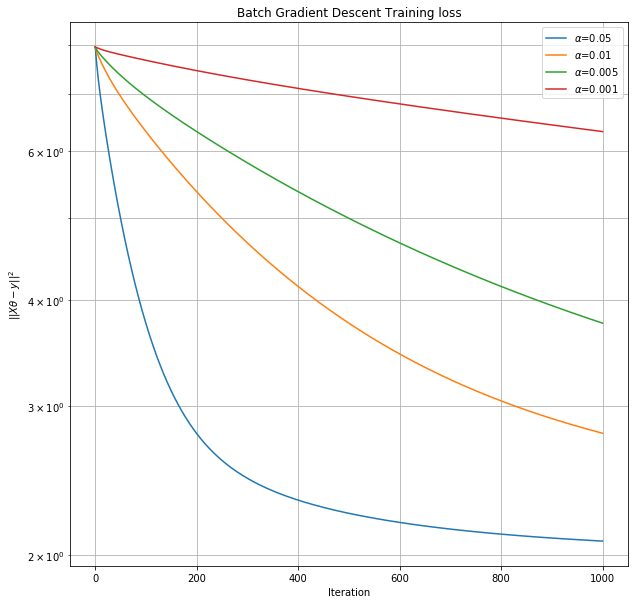

In [83]:
plt.figure(figsize=(10,10))

iters = 1000
for a in [0.05, 0.01, 0.005, 0.001]:
    theta_hist, loss_hist = batch_grad_descent(X_train, y_train, alpha=a, num_iter=iters)
    plt.semilogy(np.arange(iters + 1), loss_hist, label=r'$\alpha$={}'.format(a))

plt.title('Batch Gradient Descent Training loss')
plt.grid(True, which='major')
plt.grid(True, which='minor')
plt.legend()

plt.xlabel('Iteration')
plt.ylabel(r'$||X\theta - y||^2$')
plt.savefig(os.path.join('..','imgs','training_loss.png'))

# Problem 2.5 #